In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=20,n_features=1,noise=6)

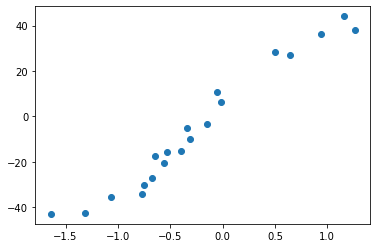

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
lr=LinearRegression()

In [7]:
lr.fit(x,y)

LinearRegression()

In [8]:
m=lr.coef_
m

array([34.56640697])

In [9]:
b=lr.intercept_
b

2.7071747787265625

Text(0.5, 1.0, 'Loss : 5.6848000592994135 , Accuracy : 0.9567787953563031')

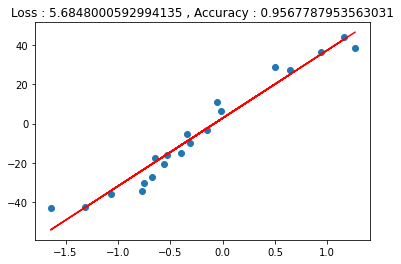

In [10]:
plt.plot(x,lr.predict(x),'r-')
plt.scatter(x,y)
plt.title(f'Loss : {np.sqrt(mean_squared_error(y,lr.predict(x)))} , Accuracy : {r2_score(y,lr.predict(x))}') # f input pass karne ke liye variable print karne ke liye

In [11]:
x

array([[-0.67256049],
       [-0.01887783],
       [-1.31344252],
       [-0.76893047],
       [-0.15298222],
       [-0.64902534],
       [-1.64301568],
       [-0.75378393],
       [ 0.50498242],
       [-0.05250881],
       [-0.55905701],
       [ 1.16079447],
       [ 0.94007736],
       [-1.06334311],
       [ 0.64856748],
       [-0.3931821 ],
       [-0.53150957],
       [-0.34405111],
       [-0.30672103],
       [ 1.26397278]])

In [12]:
x.ravel() # 1 d convert

array([-0.67256049, -0.01887783, -1.31344252, -0.76893047, -0.15298222,
       -0.64902534, -1.64301568, -0.75378393,  0.50498242, -0.05250881,
       -0.55905701,  1.16079447,  0.94007736, -1.06334311,  0.64856748,
       -0.3931821 , -0.53150957, -0.34405111, -0.30672103,  1.26397278])

In [17]:
x1=x
y1=y

In [21]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m=0
        self.b=0
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,x,y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slop_b=-2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slop_m=-2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            
            self.b=self.b-(self.lr*loss_slop_b)
            self.m=self.m-(self.lr*loss_slop_m)
        
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m*x+self.b
            

In [22]:
gd=GDRegressor(0.001,1000) 

In [23]:
gd.fit(x,y) # value of m & b

34.56640695962335 2.707174772908223


Slope 0.9071102780852737, yintercept 2.663044982612235, Loss 27.79655378976365
Slope 1.787317509255315, yintercept 2.3481033419669246, Loss 27.012721251694344
Slope 2.641532681472061, yintercept 2.0540414070227384, Loss 26.25949777126639
Slope 3.4706322817441912, yintercept 1.7797794252419237, Loss 25.53549968291541
Slope 4.275459706099331, yintercept 1.5242890812240197, Loss 24.839410328797104
Slope 5.056826609319734, yintercept 1.2865911278609263, Loss 24.169977013093185
Slope 5.815514197076146, yintercept 1.0657531249456922, Loss 23.526008076341252
Slope 6.552274462977913, yintercept 0.8608872803948898, Loss 22.90637008522777
Slope 7.267831372946009, yintercept 0.6711483894617392, Loss 22.309985133565828
Slope 7.962881999209172, yintercept 0.495731867524701, Loss 21.735828250436033
Slope 8.63809760612161, yintercept 0.33387187223451575, Loss 21.182924911700123
Slope 9.294124689903573, yintercept 0.1848395109920294, Loss 20.650348651304892
Slope 9.931585974313174, yintercept 0.047941

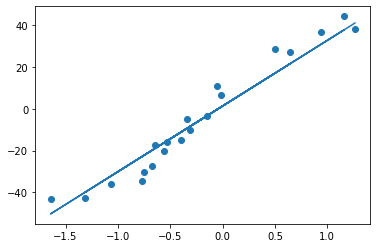

In [24]:
m = 0
b =3
lr = 0.001
hh = []
slope = []
intercept = []
for i in range(100):
    loss_slope_b = -2 * np.sum(y - m*x.ravel() - b)
    loss_slope_m = -2 * np.sum((y - m*x.ravel() - b)*x.ravel())
            
    b = b - (lr * loss_slope_b)
    m = m - (lr * loss_slope_m)
    yhat= np.sqrt(mean_squared_error(y,(m*x)+b))
    ht = hh.append(yhat)
    ss = slope.append(m)
    ii= intercept.append(b)
    print(f"Slope {m}, yintercept {b}, Loss {yhat}")
    #print(hh)
plt.plot(x,slope[i] *x + intercept[i])
plt.scatter(x,y)
plt.show()